In [2]:
import pandas as pd
import glob

In [3]:
path = '/name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV' 

In [4]:
files_20190901 = glob.glob(path + "/temp_and_volt_final_data_90_40_20190901*")

In [5]:
all_li_20190901 = []
for filename in files_20190901:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    print('Read {} records from file {}'.format(len(df_temp), filename))
    all_li_20190901.append(df_temp)

Read 966540 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part1.csv.gz
Read 931253 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part3.csv.gz
Read 961179 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part2.csv.gz
Read 840241 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part5.csv.gz
Read 361602 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part8.csv.gz
Read 906585 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_volt_final_data_90_40_20190901_part6.csv.gz
Read 967924 records from file /name-node-raid/raw_temperature_voltage_readings/final_data/A5HEV/temp_and_v

In [6]:
frame_all_20190901 = pd.concat(all_li_20190901, axis=0, ignore_index=True)

In [7]:
frame_all_20190901 = frame_all_20190901.drop(['veh_curr'], axis=1)

In [8]:
frame_all_20190901.columns

Index([u'vin', u'ts', u'temp_1', u'temp_2', u'temp_3', u'temp_4', u'temp_5',
       u'temp_6', u'temp_7', u'temp_8',
       ...
       u'volt_81', u'volt_82', u'volt_83', u'volt_84', u'volt_85', u'volt_86',
       u'volt_87', u'volt_88', u'volt_89', u'volt_90'],
      dtype='object', length=132)

In [9]:
voltage_list = ["volt_" + str(s) for s in range(1,91)]

In [10]:
frame_all_20190901 = frame_all_20190901.drop(voltage_list, axis=1)

In [11]:
frame_all_20190901.head()

,vin,ts,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,...,temp_31,temp_32,temp_33,temp_34,temp_35,temp_36,temp_37,temp_38,temp_39,temp_40
0,LMGHP1S53H1001012,1567267205000,23.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,24.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
1,LMGHP1S53H1000295,1567267205000,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
2,LMWHP1S2XJ1000097,1567267205000,31.0,30.0,30.0,30.0,29.0,30.0,30.0,29.0,...,30.0,30.0,30.0,30.0,30.0,29.0,29.0,30.0,30.0,29.0
3,LMWHP1S24J1000001,1567267205000,29.0,29.0,28.0,29.0,29.0,29.0,29.0,29.0,...,29.0,30.0,30.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
4,LMGHP1S52J1003341,1567267205000,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0


In [12]:
temp_20190901 = frame_all_20190901.drop(['vin', 'ts'], axis=1)

In [13]:
import itertools as it
temp_20190901_df = pd.DataFrame(sorted(it.chain(*temp_20190901.values)))

In [14]:
temp_20190901_df.describe()

,0
count,2.723749e+08
mean,2.894675e+01
std,2.524635e+00
min,-4.000000e+01
25%,2.800000e+01
50%,2.900000e+01
75%,3.100000e+01
max,2.060000e+02


In [15]:
temp_20190901_df.columns=['temp']

In [17]:
temp_20190901_df.to_csv("temp_20190901_df.csv")

In [18]:
import seaborn as sns

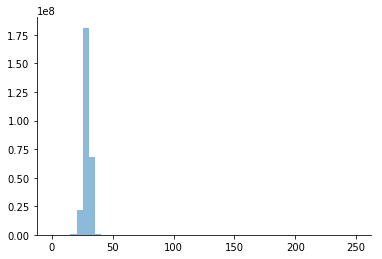

In [24]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 250, 50)

fig, axs = plt.subplots()

axs.hist(temp_20190901_df['temp'], label = 'temp', bins=bins, alpha=0.5)

#plt.yscale('log')
sns.despine()

In [3]:
import time
import sys

import findspark
findspark.init('/usr/hdp/current/spark2-client')

import pyspark
from pyspark.sql.functions import col

from sys import path
path.insert(0, '/home/prod/git/common/collect_raw_data_utils')
from data_collection import *
path.insert(0, '/home/prod/git/common/pyspark_utils')
from get_spark import get_spark
SPARK_CONFIG_LIST = [
    ('spark.app.name', 'name'),           # spark job name
    ('spark.yarn.queue', 'dev'),                          # for production code, use 'prod', else use 'dev'
    ('spark.master', 'yarn'),                              # choose between 'yarn', 'local', or 'local[*]'
    ('spark.submit.deployMode', 'client'),                 # 'client' or 'cluster' mode
    ('spark.yarn.am.memory', '10g'),  #20                      # memory for spark driver (application master), for client mode
    ('spark.executor.memory', '10g'),       #20                # memory for each executor
    ('spark.executor.cores', '5'),                         # max number of cores each executor can use (means number of tasks)
    ('spark.executor.instances', '10'),  #20                  # max number of executors
]


spark = get_spark(SPARK_CONFIG_LIST)
sc = spark.sparkContext

hc = HiveContext(sc)

In [4]:
def convert_ts_to_datetime(ts_series):
    """
    This function converts timestamps into datetime objects

    Parameters
    ----------
    ts_series : Pandas Series of timestamps

    Returns
    ----------
    datetime_series : Pandas Series of strings of datetimes

    Notes
    -----
    This function can accept these ts units: s, ms, us, ns
    """

    available_units = {19:'ns', 16:'us', 13:'ms', 10:'s'}
    time_zone = 'Asia/Hong_Kong'

    def _epoch_time_converter(t):
        t = str(t)
        if len(t) in available_units.keys():
            unit = available_units[len(t)]
        else:
            raise AttributeError('{} is not in valid epoch time format'.format(t))
        return pd.to_datetime(t, unit=unit, utc=True).tz_convert(time_zone)

    digits = ts_series.astype(str).str.len()
    # only one unit of ts is in the whole series,
    # so use vectorized method to convert
    if len(digits.unique()) == 1:
        if digits.iloc[0] in available_units.keys():
            unit_of_ts = available_units[digits.iloc[0]]
            datetime_series = pd.to_datetime(ts_series, unit=unit_of_ts, 
                                             utc=True).dt.tz_convert(time_zone)
        else:
            raise AttributeError('input ts is not in valid epoch time format')

    # several units of ts found,
    # has to convert to datetime using apply (i.e., one row at a time)
    else:
        datetime_series = ts_series.apply(_epoch_time_converter)

    return datetime_series

In [5]:
num_cells = 90
num_modules = 40
vintype = ['A5HEV']
sel_col = ['day', 'vin', 'ts']
#sel_col += ["veh_curr", "veh_charge_st", "esd_sc_temp_list", "esd_sc_volt_list"]
sel_col += ["esd_sc_temp_list"]

In [41]:
vins = []
date_to_check = '20191202'

In [42]:
import pyspark.sql.functions as F

schema = "day string, vin string"
schema += ", veh_charge_st short, veh_soc short, veh_volt float"
schema += ", veh_insulation int,  veh_curr float, min_volt float, max_volt float"
schema += ", min_temp int, max_temp int, delta_volt float, temp_mean float"

@F.pandas_udf(schema, F.PandasUDFType.GROUPED_MAP)
def filters(pdf):
    pdf.dropna(how="any", inplace=True)
    filter_conds = pdf.min_temp >= 65
    filter_conds = (filter_conds) or (pdf.min_temp <= -40)
    filter_conds = (filter_conds) or (pdf.max_temp >= 100)
    filter_conds = (filter_conds) or (pdf.max_temp <= -20)
    
    return pdf.loc[filter_conds, :]

In [43]:
import pyspark.sql.functions as F

def read_data(date_to_check):
    raw_spark_df = get_raw_records_in_spark(hc, 
                                        vin_types=vintype,
                                       vins=vins,
                                        record_times=date_to_check, 
                                        sel_cols=sel_col, 
                                        nrows_to_print=None)
    print("Get raw records in spark done!")
    raw_spark_df = raw_spark_df.repartition(1000, "vin")

    casted_columns = ['day', 'vin', col('ts').cast("long").alias('ts'), 'record_time',
                   # col("veh_curr").cast("float").alias("veh_curr"),
                   #  col("veh_odo").cast("float").alias("veh_odo"),
                   #  col("veh_charge_st").cast("short").alias("veh_charge_st"),
                   #  col("veh_st").cast("int").alias("veh_st"),
                   "esd_sc_temp_list", 
                   #"esd_sc_volt_list", 
                   ]
    raw_spark_df = raw_spark_df.select(*casted_columns)
    print("Select columns done!")
    
    raw_spark_df = convert_signal_str_to_col_use_spark(
        raw_spark_df,
        cols_split_dict={
            'esd_sc_temp_list':("temp", num_modules, "\|", "int"),
          #  'esd_sc_volt_list':("volt", num_cells, "\|", "float")
        },
        #other_cols=[c for c in raw_spark_df.columns if c not in ["esd_sc_temp_list", "esd_sc_volt_list"]]
        other_cols=[c for c in raw_spark_df.columns if c not in ["esd_sc_temp_list"]]
    )
    print("Split columns done!")
    
    raw_spark_df = raw_spark_df.withColumn('min_temp', F.least(*[col("temp_" + str(i+1)) for i in range(num_modules)]))
    raw_spark_df = raw_spark_df.withColumn('max_temp', F.greatest(*[col("temp_" + str(i+1)) for i in range(num_modules)]))

    drop_cols = ["temp_" + str(i+1) for i in range(num_modules)]
    drop_cols += ['ts', 'record_time']
    raw_spark_df = raw_spark_df.drop(*drop_cols)    
    print("Drop columns done!")
    #raw_spark_df = raw_spark_df.groupby(['day', 'vin']).apply(filters)
    
    raw_spark_df = raw_spark_df.filter((raw_spark_df['min_temp'] >= 65) | (raw_spark_df['min_temp'] <= -40) | (raw_spark_df['max_temp'] >= 100) | (raw_spark_df['max_temp'] <= -20))
    print("Filtering done!")
                 
    #return raw_spark_df.toPandas()
    return raw_spark_df

In [44]:
df = read_data(date_to_check)

submitting query 
SELECT day, vin, ts, esd_sc_temp_list FROM 
guobiao_tsp_tbls.guobiao_raw_orc
WHERE vintype = 'A5HEV'
AND day = '20191202'
ORDER BY vin, ts
Get raw records in spark done!
Select columns done!
Split columns done!
Drop columns done!
Filtering done!


In [45]:
#df.coalesce(1).write.csv("/data/home/burst_20191116.csv")
stime = time.time()
df.toPandas().to_csv("burst_20191202.csv")
etime = time.time()
print "Finished in {} seconds".format(etime - stime)

Finished in 1212.60083699 seconds
